In [1]:
import numpy as np
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

In [1]:
import numpy as np

my_arr = np.arange(1_000_000)
my_list = list(range(1_000_000))

NumPy-based algorithms are generally 10 to 100 times faster (or more)
than their pure Python counterparts and use significantly less memory.

In [2]:
%timeit my_arr2 = my_arr * 2


1.4 ms ± 14.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
60.7 ms ± 696 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [3]:
%timeit my_list2 = [x * 2 for x in my_list]

64 ms ± 3.63 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


One of the key features of NumPy is its N-dimensional array object, or
ndarray, which is a fast, flexible container for large datasets in Python.

In [4]:
import numpy as np
data = np.array([[1.5, -0.1, 3], [0, -3, 6.5]])
data

An ndarray is a generic multidimensional container for homogeneous
data; that is, all of the elements must be the same type.

In [5]:
data * 10
data + data

Every array has a shape, a tuple indicating the size of each dimension, and a
dtype, an object describing the data type of the array:

In [6]:
data.shape
data.dtype

The easiest way to create an array is to use the array function. This
accepts any sequence-like object (including other arrays) and produces
a new NumPy array containing the passed data.

In [7]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

In [8]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

In [9]:
arr2.ndim
arr2.shape

In [10]:
arr1.dtype
arr2.dtype

In addition to numpy.array, there are a number of other functions for
creating new arrays.It’s not safe to assume that numpy.empty will return an array of all zeros. This
function returns uninitialized memory and thus may contain nonzero “garbage”
values.

In [11]:
np.zeros(10)
np.zeros((3, 6))
np.empty((2, 3, 2))

In [12]:
np.arange(15)

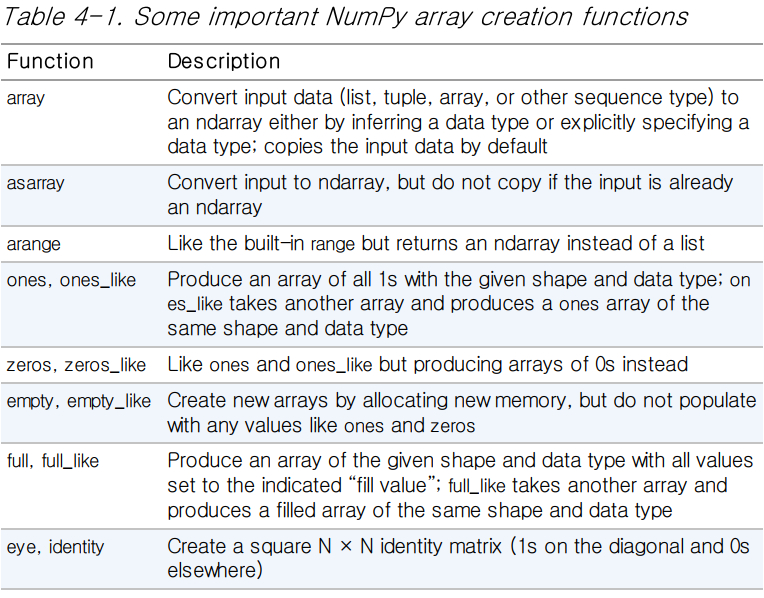

The data type or dtype is a special object containing the information
(or metadata, data about data) the ndarray needs to interpret a chunk
of memory as a particular type of data:

In [13]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
arr1.dtype
arr2.dtype

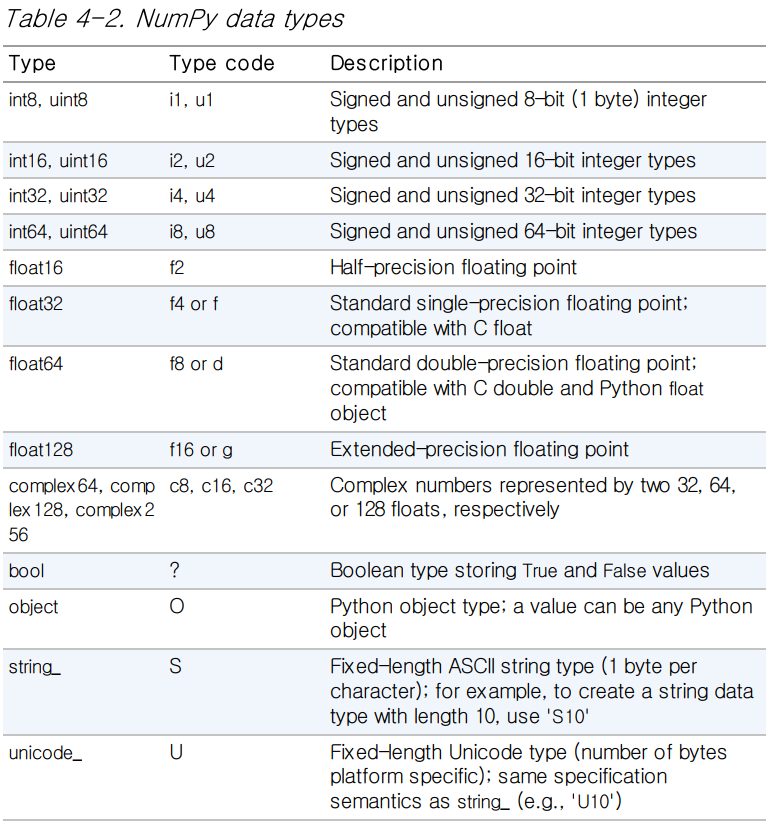

You can explicitly convert or cast an array from one data type to
another using ndarray’s astype method:

In [14]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype


In [ ]:
float_arr = arr.astype(np.float64)
float_arr


In [ ]:
float_arr.dtype

If I cast some floating-point numbers to be of integer data type, 
the decimal part will be truncated:

In [15]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr


In [ ]:
arr.astype(np.int32)

If you have an array of strings representing numbers, you can use
astype to convert them to numeric form:

In [16]:
numeric_strings = np.array(["1.25", "-9.6", "42"], dtype=np.string_)
numeric_strings.astype(float)

You can also use another array’s dtype attribute:

In [17]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

There are shorthand type code strings you can also use to refer to a
dtype:

In [18]:
zeros_uint32 = np.zeros(8, dtype="u4")
zeros_uint32

Any arithmetic operations between equal-size arrays
apply the operation element-wise:

In [19]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr


In [ ]:
arr * arr


In [ ]:
arr - arr

Arithmetic operations with scalars propagate the scalar argument to
each element in the array:

In [20]:
1 / arr


In [ ]:
arr ** 2

Comparisons between arrays of the same size yield Boolean arrays:

In [21]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2

In [ ]:
arr2 > arr

Basic Indexing and Slicing: Onedimensional arrays are simple; 
on the surface they act similarly to Python lists:

In [22]:
arr = np.arange(10)
arr


In [ ]:
arr[5]


In [ ]:
arr[5:8]


In [ ]:
arr[5:8] = 12
arr

Note that the data is not copied, and any
modifications to the viewwill be reflected in the source array.
To give an example of this, I first create a slice of arr:

In [23]:
arr_slice = arr[5:8]
arr_slice

Now, when I change values in arr_slice, 
the mutations are reflected in the original array arr:

In [24]:
arr_slice[1] = 12345
arr

In [25]:
arr_slice[:] = 64
arr

In a twodimensional array, the elements at each index are no longer scalars but
rather one-dimensional arrays:

In [26]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

But that is a bit
too much work, so you can pass a comma-separated list of indices to
select individual elements. So these are equivalent:

In [27]:
arr2d[0][2]
arr2d[0, 2]

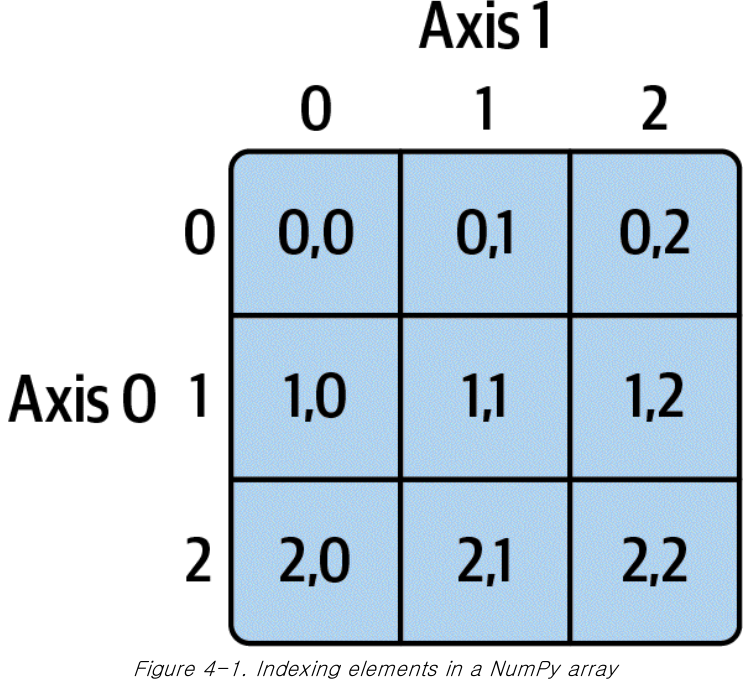

In multidimensional arrays, if you omit later indices, the returned object
will be a lower dimensional ndarray consisting of all the data along the
higher dimensions. 

In [28]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

arr3d[0] is a 2 × 3 array:

In [29]:
arr3d[0]

Both scalar values and arrays can be assigned to arr3d[0]:

In [30]:
old_values = arr3d[0].copy()
arr3d[0] = 42
arr3d


In [ ]:
arr3d[0] = old_values
arr3d

Similarly, arr3d[1, 0] gives you all of the values whose indices start
with (1, 0), forming a one-dimensional array:

In [31]:
arr3d[1, 0]

This expression is the same as though we had indexed in two steps:

In [32]:
x = arr3d[1]
x


In [ ]:
x[0]

Indexing with slices:
Like one-dimensional objects such as Python lists, ndarrays can be
sliced with the familiar syntax:

In [33]:
arr


In [ ]:
arr[1:6]

In [34]:
arr2d


In [ ]:
arr2d[:2]

You can pass multiple slices just like you can pass multiple indexes:

In [35]:
arr2d[:2, 1:]

By mixing integer indexes and slices, you get
lower dimensional slices.
For example, I can select the second row but only the first two
columns, like so:

In [36]:
lower_dim_slice = arr2d[1, :2]

In [37]:
lower_dim_slice.shape

Similarly, I can select the third column but only the first two rows, like
so:

In [38]:
arr2d[:2, 2]

Note that a colon by itself means to
take the entire axis, so you can slice only higher dimensional axes by doing:

In [39]:
arr2d[:, :1]

assigning to a slice expression assigns to the whole
selection:

In [40]:
arr2d[:2, 1:] = 0
arr2d

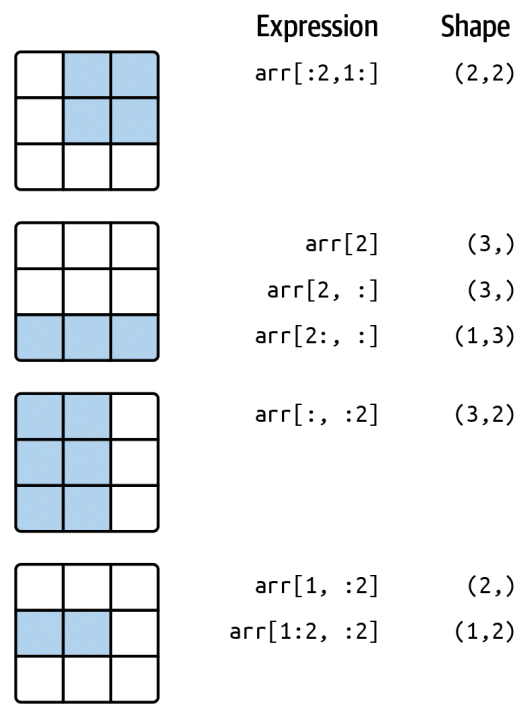

In [41]:
names = np.array(["Bob", "Joe", "Will", "Bob", "Will", "Joe", "Joe"])
data = np.array([[4, 7], [0, 2], [-5, 6], [0, 0], [1, 2],
                 [-12, -4], [3, 4]])
names


In [ ]:
data

comparing names with the string "Bob" yields a
Boolean array:

In [42]:
names == "Bob"

This Boolean array can be passed when indexing the array:

In [43]:
data[names == "Bob"]

You can even mix and match Boolean arrays with slices or
integers

In [44]:
data[names == "Bob", 1:]


In [ ]:
data[names == "Bob", 1]

To select everything but "Bob" you can either use != or negate the
condition using ~:

In [45]:
names != "Bob"


~(names == "Bob")


data[~(names == "Bob")]

In [46]:
cond = names == "Bob"
data[~cond]

To select two of the three names to combine multiple Boolean
conditions, use Boolean arithmetic operators like & (and) and | (or):

In [47]:
mask = (names == "Bob") | (names == "Will")
mask


In [ ]:
data[mask]

In [ ]:
To set all of the negative values in data to 0,
we need only do:

In [48]:
data[data < 0] = 0
data

You can also set whole rows or columns using a one-dimensional
Boolean array:

In [49]:
data[names != "Joe"] = 7
data

Fancy Indexing:
Fancy indexing is a term adopted by NumPy to describe indexing
using integer arrays. 

In [50]:
arr = np.zeros((8, 4))
for i in range(8):
    arr[i] = i
arr

To select a subset of the rows in a particular order, you can simply
pass a list or ndarray of integers specifying the desired order:

In [51]:
arr[[4, 3, 0, 6]]

In [52]:
arr[[-3, -5, -7]]

Passing multiple index arrays does something slightly different; it selects
a one-dimensional array of elements corresponding to each tuple of
indices:

In [53]:
arr = np.arange(32).reshape((8, 4))
arr


In [ ]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

The behavior of fancy indexing in this case is a bit different from what
some users might have expected (myself included), which is the
rectangular region formed by selecting a subset of the matrix’s rows
and columns. Here is one way to get that:

In [54]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

If you assign values with fancy indexing, the indexed values will be modified:

In [55]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]


In [ ]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]] = 0
arr

Transposing Arrays and Swapping Axes: 
Arrays have the transpose method and the special T attribute:

In [56]:
arr = np.arange(15).reshape((3, 5))
arr


In [ ]:
arr.T

When doing matrix computations, you may do this very often—for
example, when computing the inner matrix product using numpy.dot:

In [57]:
arr = np.array([[0, 1, 0], [1, 2, -2], [6, 3, 2], [-1, 0, -1], [1, 0, 1]])
arr


In [ ]:
np.dot(arr.T, arr)

The @ infix operator is another way to do matrix multiplication:

In [58]:
arr.T @ arr

ndarray
has the method swapaxes, which takes a pair of axis numbers and
switches the indicated axes to rearrange the data:

In [59]:
arr


In [ ]:
arr.swapaxes(0, 1)

you can get a 4 × 4 array of samples from the standard normal distribution
using numpy.random.standard_normal:

In [60]:
samples = np.random.standard_normal(size=(4, 4))
samples

Compared to Python’s built-in random module, numpy.random is well
over an order of magnitude faster for generating very large samples:

In [61]:
from random import normalvariate
N = 1_000_000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

In [ ]:
%timeit np.random.standard_normal(N)

Functions like numpy.random.standard_normal use the numpy.random module’s default
random number generator, but your code can be configured to use an explicit generator:

In [62]:
rng = np.random.default_rng(seed=12345)
data = rng.standard_normal((2, 3))

In [63]:
type(rng)

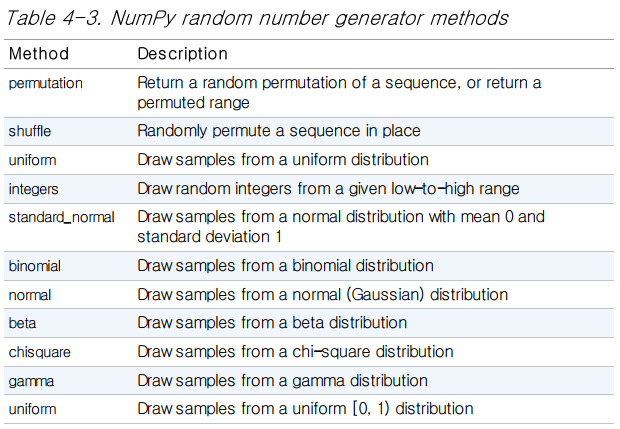

Many ufuncs are simple element-wise transformations, like numpy.sqrt
or numpy.exp:

In [64]:
arr = np.arange(10)
arr


In [ ]:
np.sqrt(arr)


In [ ]:
np.exp(arr)

These are referred to as unary ufuncs. Others, such as numpy.add or
numpy.maximum, take two arrays (thus, binary ufuncs) and return a
single array as the result:

In [65]:
x = rng.standard_normal(8)
y = rng.standard_normal(8)
x


In [ ]:
y


In [ ]:
np.maximum(x, y)

numpy.modf is one example: a vectorized version of the built-in Python math.modf, it
returns the fractional and integral parts of a floating-point array:

In [66]:
arr = rng.standard_normal(7) * 5
arr


In [ ]:
remainder, whole_part = np.modf(arr)
remainder


In [ ]:
whole_part

Ufuncs accept an optional out argument that allows them to assign their
results into an existing array rather than create a new one:

In [67]:
arr



In [ ]:
out = np.zeros_like(arr)
np.add(arr, 1)


In [ ]:
np.add(arr, 1, out=out)


In [ ]:
out

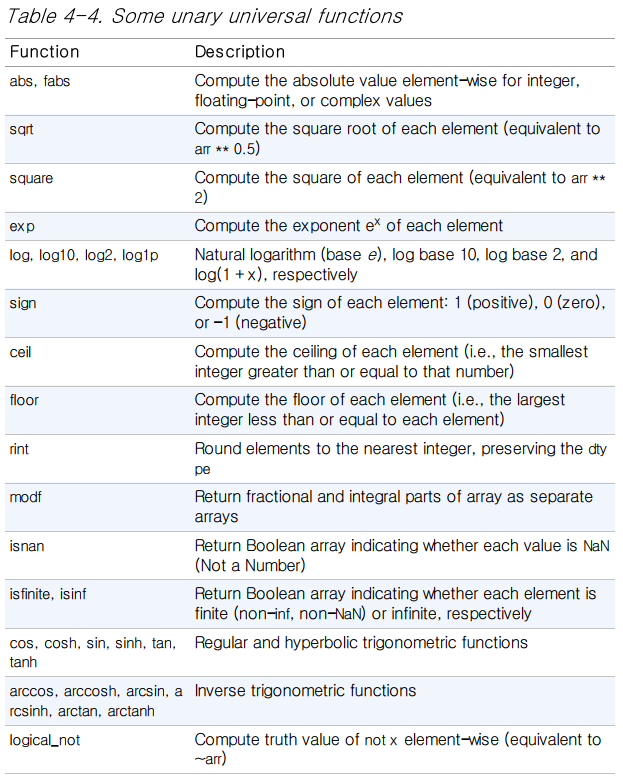

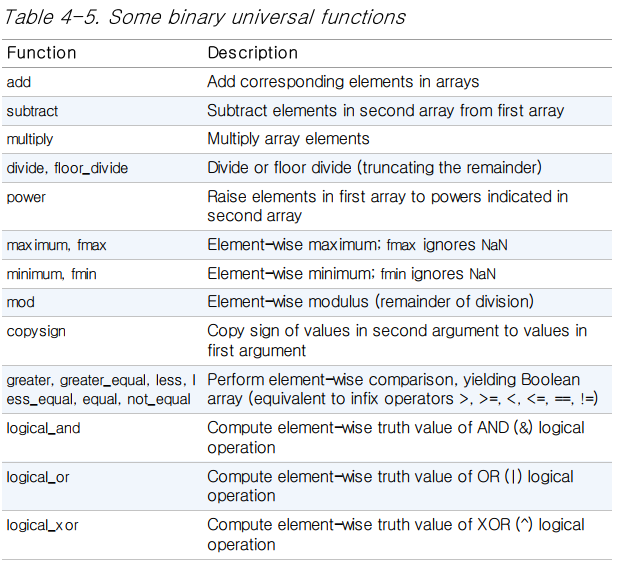

The numpy.meshgrid
function takes two one-dimensional arrays and produces two twodimensional matrices corresponding to all pairs of (x, y) in the two
arrays:

In [68]:
points = np.arange(-5, 5, 0.01) # 100 equally spaced points
xs, ys = np.meshgrid(points, points)
ys

In [69]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

In [70]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray, extent=[-5, 5, -5, 5])
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

In [71]:
plt.draw()

In [72]:
plt.close("all")

The numpy.where function is a vectorized version of the ternary
expression x if condition else y.

In [73]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

Suppose we wanted to take a value from xarr whenever the
corresponding value in cond is True, and otherwise take the value from
yarr. A list comprehension doing this might look like:

In [74]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

This has multiple problems. First, it will not be very fast for large arrays
(because all the work is being done in interpreted Python code).
Second, it will not work with multidimensional arrays. With numpy.where
you can do this with a single function call:

In [75]:
result = np.where(cond, xarr, yarr)
result

The second and third arguments to numpy.where don’t need to be
arrays; one or both of them can be scalars. 

In [76]:
arr = rng.standard_normal((4, 4))
arr


In [ ]:
arr > 0


In [ ]:
np.where(arr > 0, 2, -2)

You can combine scalars and arrays when using numpy.where.

In [77]:
np.where(arr > 0, 2, arr) # set only positive values to 2

Mathematical and Statistical Methods

In [78]:
arr = rng.standard_normal((5, 4))
arr


arr.mean()


In [ ]:
np.mean(arr)


In [ ]:
arr.sum()

Here, arr.mean(axis=1) means “compute mean across the columns,”
where arr.sum(axis=0) means “compute sum down the rows.”:

In [79]:
arr.mean(axis=1)


In [ ]:
arr.sum(axis=0)

Other methods like cumsum and cumprod do not aggregate, instead
producing an array of the intermediate results:

In [80]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

The expression arr.cumsum(axis=0) computes the cumulative sum
along the rows, while arr.cumsum(axis=1) computes the sums along the
columns:

In [81]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

In [82]:
arr.cumsum(axis=0)
arr.cumsum(axis=1)

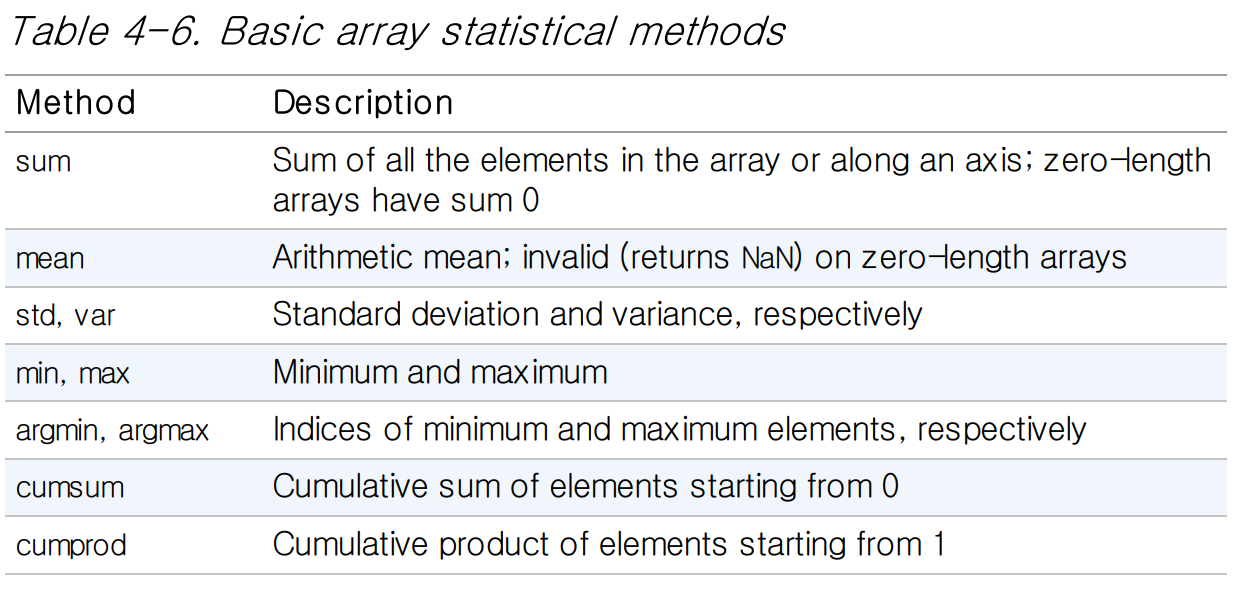

Boolean values are coerced to 1 (True) and 0 (False) in the preceding
methods. Thus, sum is often used as a means of counting True values
in a Boolean array:

In [83]:
arr = rng.standard_normal(100)
(arr > 0).sum() # Number of positive values
(arr <= 0).sum() # Number of non-positive values

any tests whether one or more values in an array is True, while
all checks if every value is True:

In [84]:
bools = np.array([False, False, True, False])
bools.any()


In [ ]:
bools.all()

Like Python’s built-in list type, NumPy arrays can be sorted in place
with the sort method:

In [85]:
arr = rng.standard_normal(6)
arr


In [ ]:
arr.sort()
arr

You can sort each one-dimensional section of values in a
multidimensional array in place along an axis by passing the axis number
to sort. In this example data:

In [86]:
arr = rng.standard_normal((5, 3))
arr

In [87]:
arr.sort(axis=0)
arr


In [ ]:
arr.sort(axis=1)
arr

The top-level method numpy.sort returns a sorted copy of an array (like
the Python built-in function sorted) instead of modifying the array in
place. For example:

In [88]:
arr2 = np.array([5, -10, 7, 1, 0, -3])
sorted_arr2 = np.sort(arr2)
sorted_arr2

Unique and Other Set Logic:
numpy.unique returns the sorted unique values in an array:

In [89]:
names = np.array(["Bob", "Will", "Joe", "Bob", "Will", "Joe", "Joe"])
np.unique(names)


In [ ]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

Contrast numpy.unique with the pure Python alternative:

In [90]:
sorted(set(names))

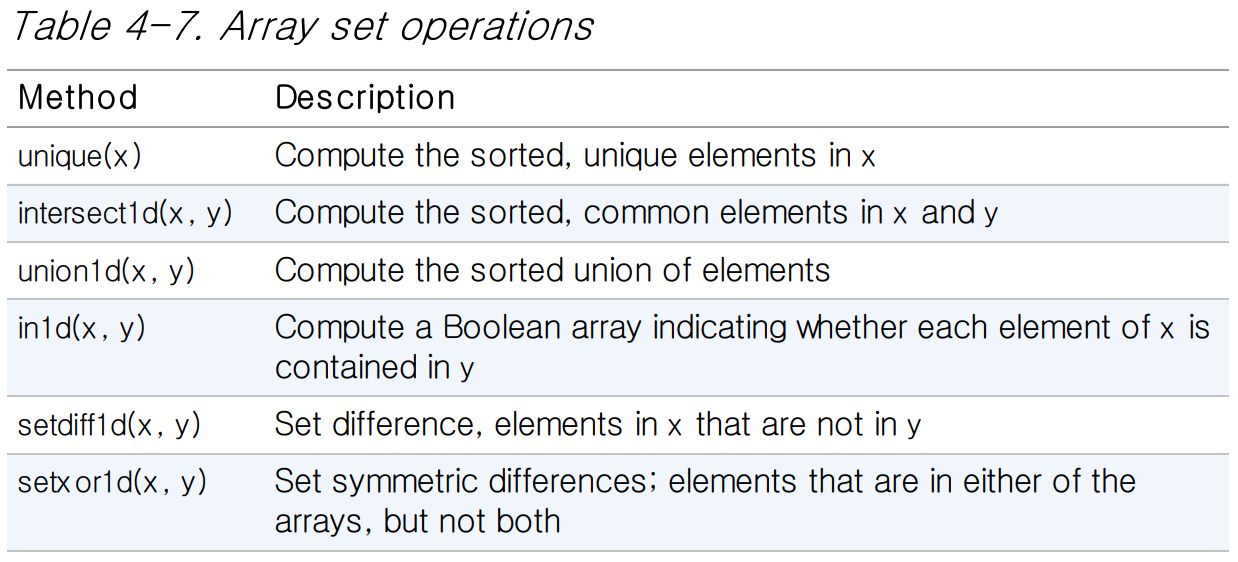

Another function, numpy.in1d, tests membership of the values in one
array in another, returning a Boolean array:

In [91]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

File Input and Output with Arrays:
numpy.save and numpy.load are the two workhorse functions for
efficiently saving and loading array data on disk.

In [92]:
arr = np.arange(10)
np.save("some_array", arr)

In [93]:
np.load("some_array.npy")

You can save multiple arrays in an uncompressed archive using
numpy.savez and passing the arrays as keyword arguments:

In [94]:
np.savez("array_archive.npz", a=arr, b=arr)

When loading an .npz file, you get back a dictionary-like object that
loads the individual arrays lazily:

In [95]:
arch = np.load("array_archive.npz")
arch["b"]

In [96]:
np.savez_compressed("arrays_compressed.npz", a=arr, b=arr)

In [97]:
!rm some_array.npy
!rm array_archive.npz
!rm arrays_compressed.npz

Linear Algebra:
there is a function dot, both an array method and a
function in the numpy namespace, for matrix multiplication:

In [98]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x


In [ ]:
y


In [ ]:
x.dot(y)

x.dot(y) is equivalent to np.dot(x, y):

In [99]:
np.dot(x, y)

In [100]:
x @ np.ones(3)

numpy.linalg has a standard set of matrix decompositions and things like
inverse and determinant:

In [101]:
from numpy.linalg import inv, qr
X = rng.standard_normal((5, 5))
mat = X.T @ X
inv(mat)


In [ ]:
mat @ inv(mat)

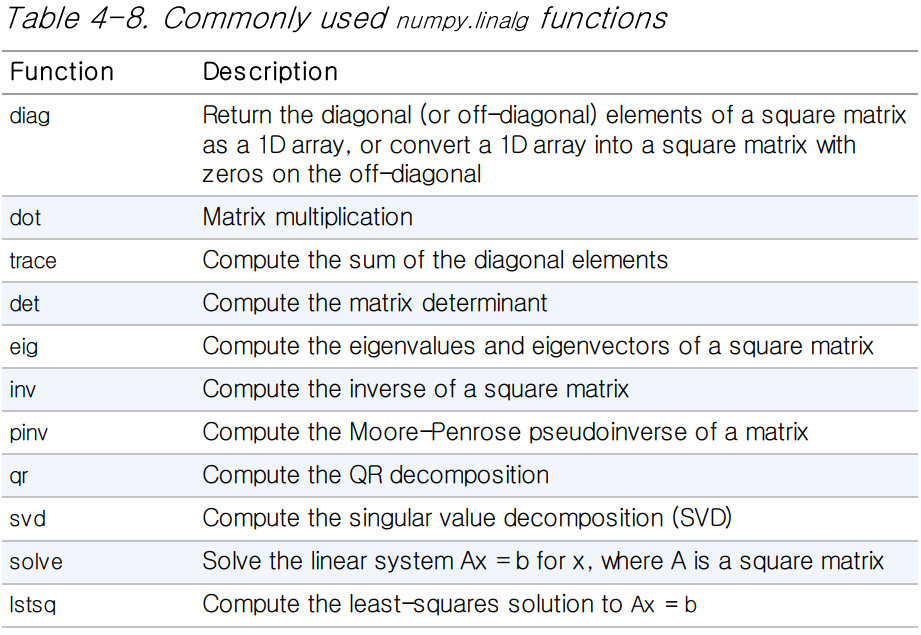

Example: Random Walks
Here is a pure Python way to implement a single random walk with
1,000 steps using the built-in random module:

In [102]:
import random
position = 0
walk = [position]
nsteps = 1000
for _ in range(nsteps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)


In [103]:
plt.figure()

In [104]:
plt.plot(walk[:100])

I use the numpy.random module to draw 1,000 coin flips at once, set
these to 1 and –1, and compute the cumulative sum:

In [105]:
nsteps = 1000
rng = np.random.default_rng(seed=12345)  # fresh random generator
draws = rng.integers(0, 2, size=nsteps)
steps = np.where(draws == 0, 1, -1)
walk = steps.cumsum()

In [106]:
walk.min()


In [ ]:
walk.max()

we can compute this using argmax, which returns the first index of the
maximum value in the Boolean array (True is the maximum value):

In [107]:
(np.abs(walk) >= 10).argmax()

 If passed a 2-tuple, the numpy.random
functions will generate a two-dimensional array of draws, and we can
compute the cumulative sum for each row to compute all five thousand
random walks in one shot:

In [108]:
nwalks = 5000
nsteps = 1000
draws = rng.integers(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(axis=1)
walks

Now, we can compute the maximum and minimum values obtained over
all of the walks:

In [109]:
walks.max()


walks.min()

Out of these walks, let’s compute the minimum crossing time to 30 or
–30. This is slightly tricky because not all 5,000 of them reach 30. We
can check this using the any method:

In [110]:
hits30 = (np.abs(walks) >= 30).any(axis=1)
hits30


In [ ]:
hits30.sum() # Number that hit 30 or -30

We can use this Boolean array to select the rows of walks that actually
cross the absolute 30 level, and call argmax across axis 1 to get the
crossing times:

In [111]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(axis=1)
crossing_times

Lastly, we compute the average minimum crossing time:

In [112]:
crossing_times.mean()

You need only use a different random generator
method, like standard_normal to generate normally distributed steps with
some mean and standard deviation:

In [113]:
draws = 0.25 * rng.standard_normal((nwalks, nsteps))